# Lab 1

Welcome to Lab 1! This notebook will help you get familiar with Python and NumPy.

Start by creating a Conda environment on the HPC using the instructions in the repo readme. Then open this notebook in that environment.

## Introduction to Python

Let's start with some basic Python operations.

### Printing and Basic Operations

In [ ]:
print('Hello, world!')
print('Sum of 2 and 3:', 2 + 3)
print('Multiplication:', 4 * 5)
print('Exponentiation:', 2 ** 3)

### Variables and Data Types

In [ ]:
a = 10
b = 3.5
c = 'Python'
d = True
print(f'Integer: {a}, Float: {b}, String: {c}, Boolean: {d}')

### Lists and Loops

In [ ]:
my_list = [1, 2, 3, 4, 5]
for item in my_list:
    print(item * 2)

### Function Definition

In [ ]:
def add_numbers(a, b):
    return a + b

print('Function output:', add_numbers(5, 7))

### Conditional Statements

In [ ]:
x = 10
if x > 5:
    print('x is greater than 5')
elif x == 5:
    print('x is 5')
else:
    print('x is less than 5')

### Dictionaries

In [ ]:
student = {'name': 'Alice', 'age': 22, 'grade': 'A'}
print(student['name'])
print(student.get('age'))

### List Comprehension

In [ ]:
squared_numbers = [x**2 for x in range(10)]
print(squared_numbers)

### Exception Handling

In [ ]:
try:
    result = 10 / 0
except ZeroDivisionError:
    print('Cannot divide by zero!')

## Introduction to NumPy

Now, let's explore NumPy.

In [ ]:
import numpy as np

a = np.array([1, 2, 3, 4])
print('NumPy Array:', a)

b = a * 2
print('Doubled Array:', b)

In [ ]:
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)
C = np.dot(A, B)
print('Matrix Multiplication Result:\n', C)
# You can also use np.matmul(A, B) or A @ B for matrix or vector multiplication or dot-product
print('Matrix Multiplication Result:\n', A @ B)

## Lab 1 Assignments

Let's get started with the exercises.

### Problem 1: Odd Numbers Function
Define a function that takes an argument `n` and returns a list of odd numbers from [0..n].

In [91]:
def odd_numbers(n):
    return [x for x in range(n + 1) if x % 2 == 1]

In [92]:
odd_numbers(7)

[1, 3, 5, 7]

### Problem 2: Read and Sort CSV File
Define a function to read 'students.csv' and return a sorted list.

In [76]:
import csv

def read_and_sort_csv(filename):
    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        students = [student for student in csv_reader]
        students.sort(key=lambda s: s[1])
        return students

In [93]:
print(read_and_sort_csv('students.csv'))

[['Ryan', '19', 'ELEN'], ['Daniel', '21', 'MECH'], ['Pedro', '22', 'AMTH'], ['Mike', '22', 'COEN'], ['Joe', '22', 'BIOE']]


### Bonus: Sort by Age Instead of Name

### Problem 3: Most Frequent Character
Define a function that counts character occurrences and returns the most frequent one.

In [95]:
def most_frequent_char(s):
    counts = {}

    maxCount = 0
    mostFreqChar = None
    
    for char in s:
        if char not in counts:
            counts[char] = 0
        counts[char] += 1
        if counts[char] > maxCount:
            maxCount = counts[char]
            mostFreqChar = char

    return mostFreqChar

In [94]:
print(most_frequent_char('hellooooo'))

o


### Problem 4: Pandas DataFrame Sorting
Redo problem 2 using Pandas.

In [96]:
import pandas as pd

def read_and_sort_csv_pandas(filename):
    df = pd.read_csv(filename, header=None)
    return df.sort_values(by=1)

In [97]:
print(read_and_sort_csv_pandas('students.csv'))

        0   1     2
3    Ryan  19  ELEN
2  Daniel  21  MECH
1    Mike  22  COEN
0   Pedro  22  AMTH
4     Joe  22  BIOE


## Part 2: NumPy and Performance Analysis

### Problem 5: NumPy Matrix Addition
Write a program that creates two 100x100 NumPy arrays and adds them using loops and `+` operator.

In [98]:
A = np.random.rand(100, 100)
B = np.random.rand(100, 100)

def add_matrices_loop(A, B):
    C = np.empty_like(A)

    rows, cols = A.shape
    
    for r in range(rows):
        for c in range(cols):
            C[r, c] = A[r, c] + B[r, c]

    return C

In [99]:
a1 = np.array([[1,2],[3,4]])
a2 = np.array([[5,6],[7,8]])
print(add_matrices_loop(a1, a2))

[[ 6  8]
 [10 12]]


In [100]:
def add_matrices_numpy(A, B):
    return A + B

In [102]:
print(add_matrices_loop(a1, a2))

[[ 6  8]
 [10 12]]


### Problem 6: Timing the Methods

In [114]:
import time

def time_execution(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return end - start

loop_times = []
numpy_times = []

for reps in range(1000):
    loop_times.append(time_execution(add_matrices_loop, A, B))
    numpy_times.append(time_execution(add_matrices_numpy, A, B))

### Problem 7: Histogram of Running Times

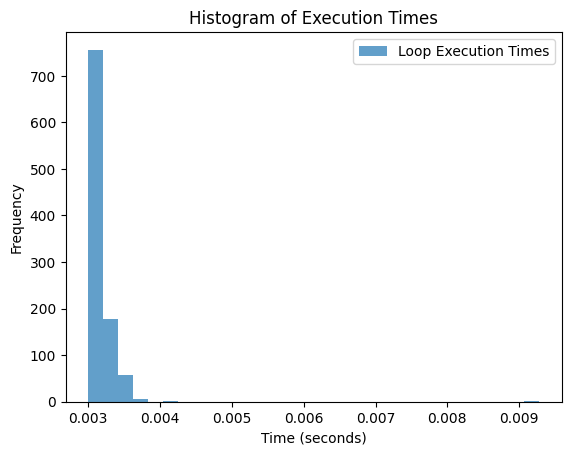

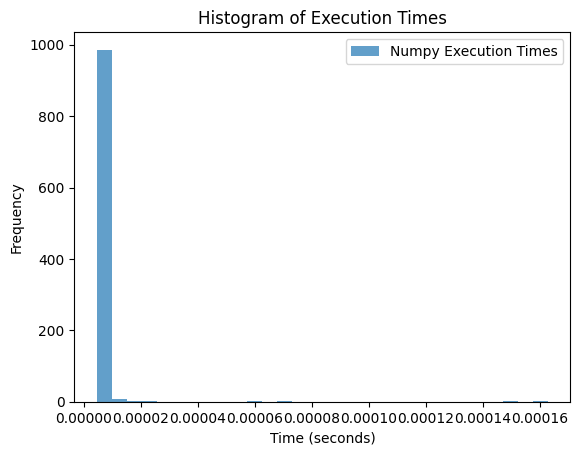

In [115]:
import matplotlib.pyplot as plt

def plot_histogram(times, method):
    plt.hist(times, bins=30, alpha=0.7, label=method)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Execution Times')
    plt.legend()
    plt.show()

plot_histogram(loop_times, "Loop Execution Times")
plot_histogram(numpy_times, "Numpy Execution Times")

### Problem 8: Your Own Example
Create a simple Python program of your choice in Jupyter Notebook.

In [116]:
def set_edges_to_zero(A):
    rows, cols = A.shape

    row_zeroes = [0] * cols
    col_zeroes = [0] * rows
    
    A[0, :] = row_zeroes;
    A[rows - 1, :] = row_zeroes;
    A[:, 0] = col_zeroes;
    A[:, cols - 1] = col_zeroes;

    return A

In [117]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr3 = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

print(set_edges_to_zero(arr1))
print(set_edges_to_zero(arr2))
print(set_edges_to_zero(arr3))

[[0 0]
 [0 0]]
[[0 0 0]
 [0 5 0]
 [0 0 0]]
[[0 0 0 0]
 [0 6 7 0]
 [0 0 0 0]]
